In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def tsne(vecs, labels, title="", ind2label = None, words = None, metric = "l2"):

  tsne = TSNE(n_components=2, random_state = 0)#, angle = 0.5, perplexity = 20)
  vecs_2d = tsne.fit_transform(vecs)
  label_names = sorted(list(set(labels.tolist())))
  num_labels = len(label_names)

  names = sorted(set(labels.tolist()))

  plt.figure(figsize=(6, 5))
  colors = "red", "blue"
  for i, c, label in zip(sorted(set(labels.tolist())), colors, names):
     plt.scatter(vecs_2d[labels == i, 0], vecs_2d[labels == i, 1], c=c,
                label=label if ind2label is None else ind2label[label], alpha = 0.3, marker = "s" if i==0 else "o")
     plt.legend(loc = "upper right")

  plt.title(title)
  plt.savefig("plots/embeddings.{}.png".format(title), dpi=600)
  plt.show()



In [40]:
layer = 1
with open("../data/states/data_with_states.layer={}.masked=True.model=bert-base-uncased.pickle".format(layer), "rb") as f:
    states = pickle.load(f)
    
random.shuffle(states)
states_rc = [s for s in states if s["label"] == 1]

proj_path = "../data/INLP/bert-base-uncased.{}.masked/type2P.iters=8.classifier=sgd-hinge.pickle".format(layer)
with open(proj_path, "rb") as f:
    Ps = pickle.load(f)

In [69]:
is_reduced = lambda x: 1 if x["sent_type"] in ["orrc", "orrc-by", "prrc", "prrc-that"] else 0
is_subj_gap = lambda x: 1 if x["sent_type"] in ["src", "prc", "prrc", "src-by", "prrc-that"] else 0
is_agentive_subj = lambda x: 1 if x["sent_type"] in ["src", "src-by"] else 0
is_active_embedded = lambda x: 1 if x["sent_type"] in ["src", "orc", "orrc", "src-by", "orc-by",
                                                      "orrc-by", "orrc-that"] else 0

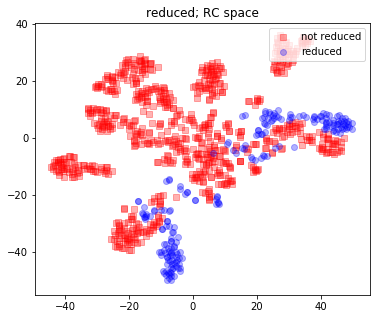

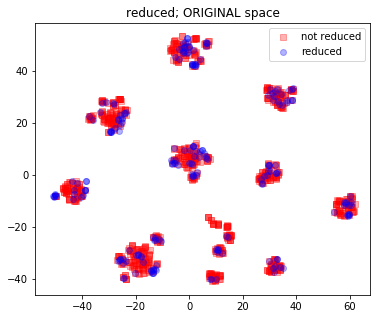

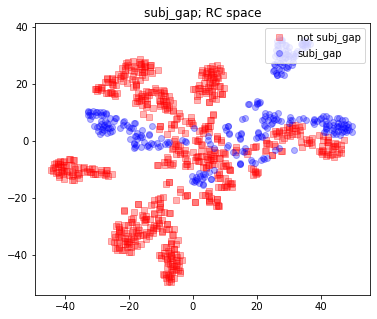

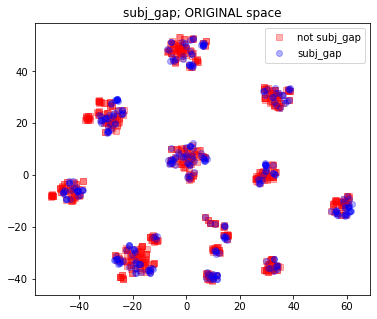

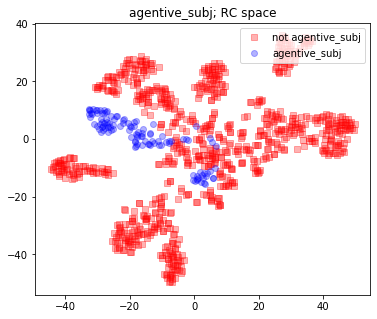

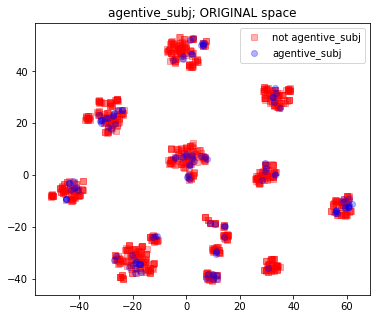

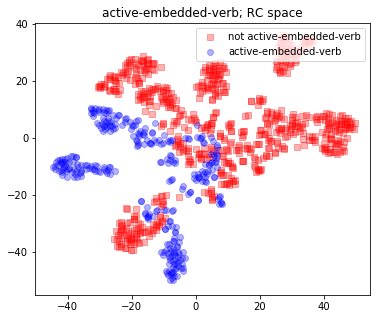

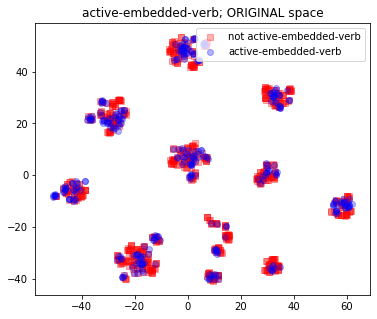

In [80]:
for func, name in zip([is_reduced, is_subj_gap, is_agentive_subj, is_active_embedded], 
                     ["reduced", "subj_gap", "agentive_subj", "active-embedded-verb"]):

    n = 1000
    X = np.array([states_rc[i]["vec"] for i in range(n)])
    Y = np.array([func(states_rc[i]) for i in range(n)])
    types = [states_rc[i]["sent_type"] for i in range(n)]
    X_proj = X.copy()
    for i in range(n):
        X_proj[i] = (np.eye(768) - Ps[types[i]])@X[i]
        
    ind2label = {1: name, 0: "not {}".format(name)}
    tsne(X_proj,Y, ind2label = ind2label, title = "{}; RC space".format(name))
    tsne(X, Y, ind2label = ind2label, title = "{}; ORIGINAL space".format(name))
    print("==============================================")